## Постановка задачи:

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Датасет содержит ряд признаков приложений с сервера Google Play. Целью является определить, платное приложение или нет.

Установливаем библиотеку Pandas:

In [ ]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импортируем необходимые модули:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [ ]:
data = pd.read_csv('/content/googleplaystore.csv')

data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Выводим первые 10 строк dataset-а:

In [ ]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Выводим последние 10 строк dataset-а:

In [ ]:
data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### О наборе данных:

- App - название приложения
- Category - категория приложения
- Rating - рейтинг приложения
- Reviews - количество отзывов о приложении
- Size - размер приложения
- Installs - количество скачиваний приложения
- Type - платное или бесплатное приложение
- Price - цена приложения
- Content Rating - возрастное ограничение
- Genres - жанр приложения
- Last Updated - последнее обновление
- Current Ver - текущая версия приложения
- Android Ver - версия Android OS, которую поддерживает приложение

Выведем описательную статистику по нашему dataset-у:

In [ ]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
data.describe(include = ['object'])

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [ ]:
data.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализируем данную матрицу корреляции:

In [ ]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


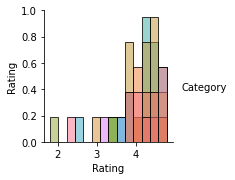

In [ ]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
sns.pairplot(data.iloc[random_subset], hue='Category', diag_kind='hist')

Так как большинство признаков номинальные, для правильной визуализации нам нужно обработать данные.

In [ ]:
data['Category'] = data['Category'].astype('category')
data['Category'] = data['Category'].replace("1.9", np.nan , regex=True)
data['Category'].dtype

CategoricalDtype(categories=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
                  'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
                  'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
                  'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
                  'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
                  'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
                  'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY',
                  'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
                  'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER'],
, ordered=False)

In [ ]:
data['Type'] = data['Type'].astype('category')
data['Type'] = data['Type'].replace("0", "Free" , regex=True)
data['Type'].dtype

CategoricalDtype(categories=['Free', 'Paid'], ordered=False)

In [ ]:
data['Genres'] = data['Genres'].astype('category')
data['Genres'].dtype

CategoricalDtype(categories=['Action', 'Action;Action & Adventure', 'Adventure',
                  'Adventure;Action & Adventure', 'Adventure;Brain Games',
                  'Adventure;Education', 'Arcade', 'Arcade;Action & Adventure',
                  'Arcade;Pretend Play', 'Art & Design',
                  ...
                  'Tools;Education', 'Travel & Local',
                  'Travel & Local;Action & Adventure', 'Trivia',
                  'Trivia;Education', 'Video Players & Editors',
                  'Video Players & Editors;Creativity',
                  'Video Players & Editors;Music & Video', 'Weather', 'Word'],
, ordered=False)

In [ ]:
data['Reviews'] = data['Reviews'].replace("3.0M", 3000000 , regex=True)
data['Reviews'] = data['Reviews'].astype('float')
data['Reviews'].dtype

dtype('float64')

In [ ]:
data['Size'] = data['Size'].replace("Varies with device", np.nan , regex=True)
data['Size'] = data['Size'].str[:-1]
data = data.replace("1,", 1 , regex=True)
data['Size'] = pd.to_numeric(data['Size'])
data['Size'].dtype

dtype('float64')

In [ ]:
data['Installs'] = data['Installs'].replace("Free", np.nan , regex=True)
data['Installs'] = data['Installs'].apply(lambda v: float(str(v).replace("+","").replace(",","")))
data['Installs'] = data['Installs'].astype('float')
data['Installs'].dtype

dtype('float64')

In [ ]:
data['Price'] = data['Price'].replace("Everyone", 0, regex=True)
data['Price'] = data['Price'].apply(lambda v: float(str(v).replace("$","")))
data['Price'].dtype

dtype('float64')

In [ ]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
data['Content Rating'] = data['Content Rating'].apply(lambda v: str(v).replace("Adults only 18+","18").replace("Mature 17+","18").replace("Teen","6").replace("Unrated","0").replace("Everyone","0").replace("0 10+", "10"))
data['Content Rating'] = data['Content Rating'].astype('float')
data['Content Rating'].dtype

dtype('float64')

In [ ]:
data.dtypes

App                 object
Category          category
Rating             float64
Reviews            float64
Size               float64
Installs           float64
Type              category
Price              float64
Content Rating     float64
Genres            category
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

Посмотрим на сбалансированность классов

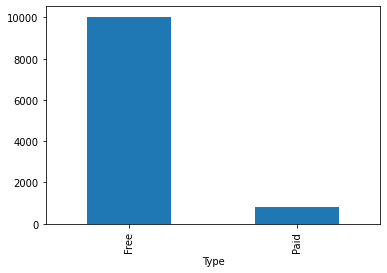

In [ ]:
data.groupby(['Type']).size().plot(kind='bar') 

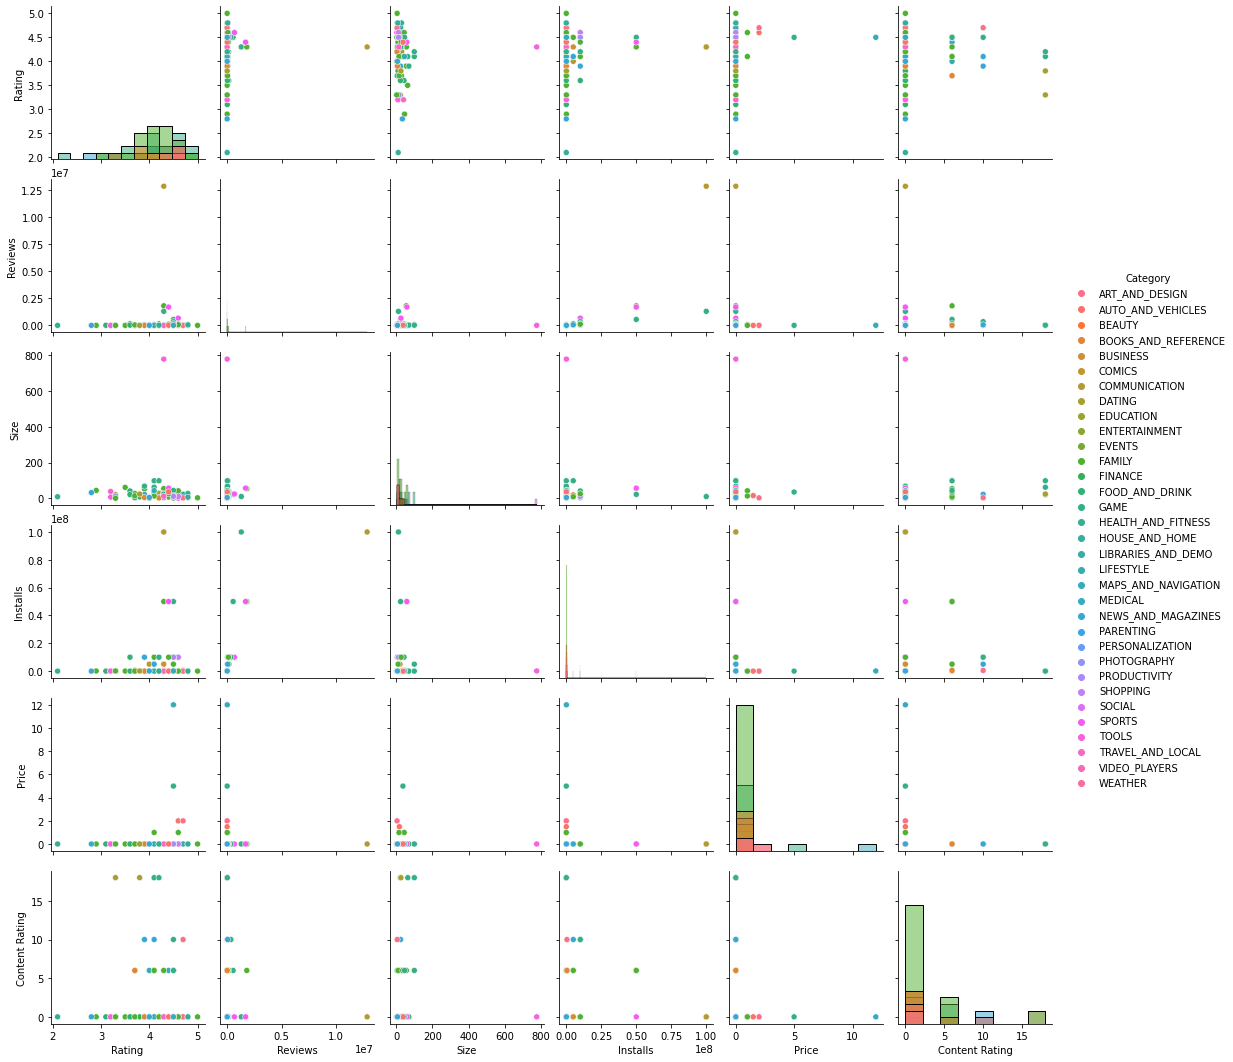

In [ ]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
sns.pairplot(data.iloc[random_subset], hue='Category', diag_kind='hist')

In [ ]:
data.corr()

,Rating,Reviews,Size,Installs,Price,Content Rating
Rating,1.000000,0.067645,-0.019305,0.080424,-0.021176,-0.001377
Reviews,0.067645,1.000000,0.032036,0.367704,-0.009672,0.058179
Size,-0.019305,0.032036,1.000000,0.016433,0.014498,-0.017409
Installs,0.080424,0.367704,0.016433,1.000000,-0.014251,0.030412
Price,-0.021176,-0.009672,0.014498,-0.014251,1.000000,-0.017587
Content Rating,-0.001377,0.058179,-0.017409,0.030412,-0.017587,1.000000


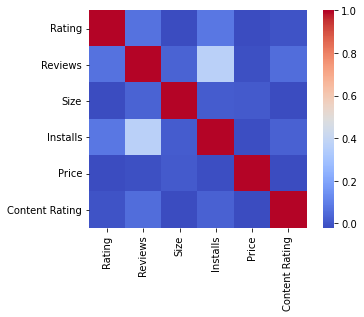

In [ ]:
sns.heatmap(data.corr(), square=True, cmap='coolwarm')

Как видно из матрицы корреляции и диаграмм рассеивания, признаки слабо коррелируют друг с другом.

## Готовим данные

Избавимся от пропущенных значений

In [ ]:
data.isna().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size              1695
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
data.drop_duplicates(subset='App', inplace=True)
data.dropna(axis=0, how="all", subset=['Android Ver'], inplace=True)
data.dropna(axis=0, how="all", subset=['Category'], inplace=True)
data.dropna(axis=0, how="all", subset=['Current Ver'], inplace=True)
data.dropna(axis=0, how="all", subset=['Type'], inplace=True)

In [ ]:
data.isna().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size              1226
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [ ]:
del data['Android Ver']
del data['Current Ver']
del data['App']
del data['Last Updated']

Избавимся от выбросов

Text(0, 0.5, 'Rating')

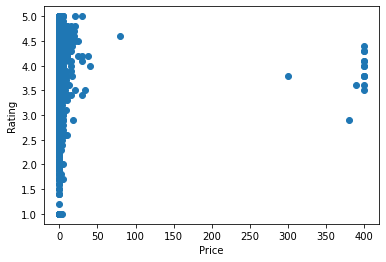

In [ ]:
plt.scatter(data['Price'], data['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')

In [ ]:
data['Price'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, 1])

0.05      0.00
0.10      0.00
0.20      0.00
0.30      0.00
0.40      0.00
0.50      0.00
0.70      0.00
0.90      0.00
0.95      1.99
1.00    400.00
Name: Price, dtype: float64

Text(0, 0.5, 'Rating')

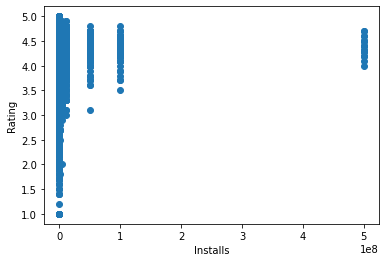

In [ ]:
plt.scatter(data['Installs'], data['Rating'])
plt.xlabel('Installs')
plt.ylabel('Rating')

In [ ]:
data['Installs'].quantile([.005,.1,.2,.3,.4,.50,.70, .8, .90, .95, .96, .98, 1])

0.005            1.0
0.100            1.0
0.200            1.0
0.300           50.0
0.400          500.0
0.500        10000.0
0.700       100000.0
0.800      5000000.0
0.900     10000000.0
0.950     10000000.0
0.960     50000000.0
0.980    100000000.0
1.000    500000000.0
Name: Installs, dtype: float64

Text(0, 0.5, 'Size')

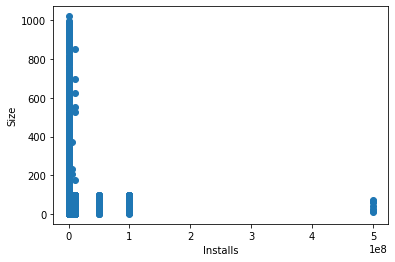

In [ ]:
plt.scatter(data['Installs'], data['Size'])
plt.xlabel('Installs')
plt.ylabel('Size')

In [ ]:
data['Size'].quantile([.05,.1,.2,.3,.4,.50,.70, .90, .95, .98, 1])

0.05       2.1
0.10       2.9
0.20       4.3
0.30       6.5
0.40       9.5
0.50      14.0
0.70      27.0
0.90      62.0
0.95      91.0
0.98     364.0
1.00    1020.0
Name: Size, dtype: float64

In [ ]:
rows_to_drop = data[
    (data['Price'] > data['Price'].quantile(0.995)) | 
    (data['Size'] > data['Size'].quantile(0.995)) | 
    (data['Installs']  > data['Installs' ].quantile(0.95)) |
    (data['Installs'] == 0)].index
data = data.drop(rows_to_drop)
data.shape

(9132, 9)

Избавляемся от оставшихся пропущенных значений при помощи медианы

In [ ]:
col = ["Rating", "Size"]
data.fillna(data[col].median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [ ]:
data.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

Удалим признак

In [ ]:
data['Genres'].unique()

['Art & Design', 'Art & Design;Pretend Play', 'Art & Design;Creativity', 'Art & Design;Action & Adventure', 'Auto & Vehicles', ..., 'Role Playing;Brain Games', 'Strategy;Education', 'Racing;Pretend Play', 'Communication;Creativity', 'Strategy;Creativity']
Length: 118
Categories (120, object): ['Action', 'Action;Action & Adventure', 'Adventure',
                           'Adventure;Action & Adventure', ..., 'Video Players & Editors;Creativity',
                           'Video Players & Editors;Music & Video', 'Weather', 'Word']

In [ ]:
del data['Genres']

Применим метод бинаризации

In [ ]:
data['Category'].unique()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (33, object): ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', ...,
                          'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']

In [ ]:
dummies = pd.get_dummies(data['Category'])

In [ ]:
dummies.head()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = pd.concat((data, dummies), axis=1)
data = data.drop(['Category'], axis=1)

Заменим на числовой

In [ ]:
data['Type'].unique()

['Free', 'Paid']
Categories (2, object): ['Free', 'Paid']

In [ ]:
data['Type'] = pd.factorize(data['Type'])[0]

In [ ]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159.0,19.0,10000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14.0,500000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.7,5000000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2.8,100000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167.0,5.6,50000.0,0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Нормализация**

In [ ]:
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

In [ ]:
data.describe()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
count,9132.000000,9.132000e+03,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,...,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000
mean,0.796356,1.184964e-03,0.033734,0.140198,0.075558,0.016001,0.094357,0.006680,0.009198,0.005804,...,0.039093,0.026172,0.037232,0.020696,0.024201,0.034275,0.084100,0.023106,0.015988,0.008213
std,0.126154,1.927887e-02,0.088280,0.315801,0.264305,0.073400,0.232804,0.081461,0.095472,0.075965,...,0.193828,0.159654,0.189339,0.142374,0.153680,0.181945,0.277553,0.150247,0.125435,0.090257
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,2.814800e-07,0.005691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.825000,9.615101e-06,0.013937,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.875000,2.716634e-04,0.030197,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разбиваем наши данные на y и x:

In [ ]:
X = data.drop(['Type', 'Price'], axis = 1)
y = data['Type']
feature_names = X.columns
print(feature_names)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Content Rating',
       'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object')


In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[7.75000000e-01 2.03433273e-06 2.09059233e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.25000000e-01 1.23723255e-05 1.50987224e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.25000000e-01 1.11965067e-03 8.94308943e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.25000000e-01 3.83836364e-08 9.87224158e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.75000000e-01 1.45857818e-06 1.39372822e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.75000000e-01 5.09615702e-03 2.09059233e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

[0. 0. 0. ... 0. 0. 0.]

(9132, 38)

(9132,)



Разделим наш dataset на обучающую и тестовую выборку:

In [ ]:
import sys
!{sys.executable} -m pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

6392 2740 (6392,) (2740,)


In [ ]:
print(np.argwhere(np.isnan(X_train)))
for i, j in np.argwhere(np.isnan(X_train)):
    X_train[i][j] = X_train[0][j]

print(np.argwhere(np.isnan(X_test)))
for i, j in np.argwhere(np.isnan(X_test)):
    X_test[i][j] = X_test[0][j]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[]
[]
(6392, 38)
(6392,)
(2740, 38)
(2740,)


Интерпретируем все значения `y` как целые числа:

In [ ]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [ ]:
print(f"{err_train}")
print(f"{err_test}")

0.0714956195244055
0.0781021897810219


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[5897   14]
 [ 443   38]]

[[2519   12]
 [ 202    7]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [ ]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=3:

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.05804130162703379
0.09160583941605839


## Другие алгоритмы обучения:

### SVC (работает очень, очень медленно):

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.07525031289111389
0.07627737226277373


### Random Forest:

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.002190237797246558
0.07408759124087591


### Extremely Randomized Trees:

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.00031289111389236547
0.07883211678832117


### AdaBoost (работает очень медленно):

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.07040050062578222
0.07992700729927008


### GBT (работает очень, очень медленно):

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.025031289111389236
0.07445255474452554


Такую высокую точность для алгоритмов мы получаем, возможно, из за несбалансированности классов, так как беспланых приложений намного больше, чем платных.

Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке состовляет ~ 0.074. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.
